# ANT Lab Task 1
##### <b>Name:</b> Aparna Sakshi
##### <b>Roll No.:</b> 18MA20007

#### Discretizing the equation

BVP is Ay"+By'+Cy=D, where A,B,C,D are functions of x<br>
<b>input:</b> 4 functions A,B,C,D; h the step size; a0y(x0)+b0y'(x0)=y0, an*y(xn)+bn*y'(xn)=yn the boundary conditions<br>
<b>output:</b> 4 arrays consisting of a<sub>i</sub>, b<sub>i</sub>, c<sub>i</sub>, d<sub>i</sub> where a<sub>i</sub> is the coefficient of y<sub>i-1</sub>, b<sub>i</sub> is the coefficient of y<sub>i</sub>, c<sub>i</sub> is the coefficient of y<sub>i+1</sub>, and d<sub>i</sub> is values

<i><b>Note:</b> In order to use derivative boundary conditions, forward and backward difference method is used</i>

In [1]:
#code
import math
def ai(A,B,h,x):
    return (A(x)/(h*h))-(B(x)/(2*h))

def bi(A,C,h,x):
    return C(x)-((2*A(x))/(h*h))

def ci(A,B,h,x):
    return (A(x)/(h*h))+(B(x)/(2*h))


def discretize(A,B,C,D,h,x0,y0,xn,yn,a0,b0,an,bn):    
    n=round((xn-x0)/h)
    
    a={}
    b={}
    c={}
    d={}
    
    x=x0+h
    for i in range(1,n):
        a[i]=ai(A,B,h,x)
        b[i]=bi(A,C,h,x)
        c[i]=ci(A,B,h,x)
        d[i]=D(x)
        x+=h
    
    den1=a0-1.5*(b0/h)
    den2=an+1.5*(bn/h)
    
    #adjusting parameters based on forward and backward difference method    
    b[1]-=(a[1]*2*(b0/h))/den1
    c[1]+=(a[1]*0.5*(b0/h))/den1
    d[1]-=a[1]*(y0/den1)
    a[n-1]-=(c[n-1]*0.5*(bn/h))/den2
    b[n-1]+=(c[n-1]*2*(bn/h))/den2
    d[n-1]-=c[n-1]*(yn/den2)   
    
    
    return a,b,c,d  

#### Get reduced coefficients - Thomas Algorithm

<b>input:</b> arrays of discretized coefficients a,b,c,d<br>
<b>output:</b> reduced coefficients c_, d_

In [2]:
#code
def reduced_coeff(a,b,c,d):
    n=len(a)+1
    c_={}
    d_={}
    c_[1]=c[1]/b[1]
    d_[1]=d[1]/b[1]
    for i in range(2,n):        
        c_[i]=c[i]/(b[i]-a[i]*c_[i-1])        
        d_[i]=(d[i]-a[i]*d_[i-1])/(b[i]-a[i]*c_[i-1])        
    return c_,d_    


#### Back substitute to get the values of y1,y2...yn-1

<b>input:</b> Reduced coefficients<br>
<b>output:</b> values of y1,y2...yn-1

In [3]:
#code
def result(c_, d_):
    n=len(c_)+1
    y={}
    y[n-1]=d_[n-1]
    for i in range(n-2,0,-1):
        y[i]=d_[i]-c_[i]*y[i+1]
    return y

In [4]:
import matplotlib.pyplot as plt
#plotting the result
def plot_result(A,B,C,D,H,x0,y0,xn,yn,key_a0=1,key_b0=0,key_an=1,key_bn=0):
    for j,h in enumerate(H):
        a,b,c,d=discretize(A,B,C,D,h,x0,y0,xn,yn,key_a0,key_b0,key_an,key_bn)
        c_,d_=reduced_coeff(a,b,c,d)
        answer=result(c_,d_)

        data = {"x":[], "y":[], "label":[]}
        data["x"].append(x0)
        data["y"].append((y0+0.5*(key_b0/h)*answer[2]-2*(key_b0/h)*answer[1])/(key_a0-1.5*(key_b0/h)))
        
        n=round((xn-x0)/h)
        x=x0+h
        for i in range(1,n):
            data["x"].append(x)
            data["y"].append(answer[i])
            x+=h
        data["x"].append(xn)        
        data["y"].append((yn-0.5*(key_bn/h)*answer[n-2]+2*(key_bn/h)*answer[n-1])/(key_an+1.5*(key_bn/h)))
        


        # plot 
        plt.figure(figsize=(5,5))
        plt.title('('+'i'*(j+1)+")" +'h='+str(h), fontsize=20)
        plt.xlabel('x', fontsize=15)
        plt.ylabel('y', fontsize=15)
        plt.plot(data["x"], data["y"], marker = 'o')

        # add labels
        for label, x, y in zip(data["label"], data["x"], data["y"]):
            plt.annotate(label, xy = (x, y))

<b>Question1:</b><br>
    x<sup>2</sup>y"+xy'= 1<br>
    y(1)=0, y(1.4)=0.0566<br>
    Solve by taking
    (i)h=0.1,
    (ii)h=0.05,
    (iii)h=0.01,

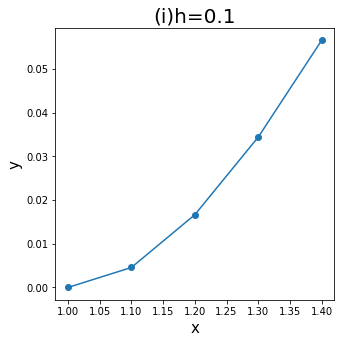

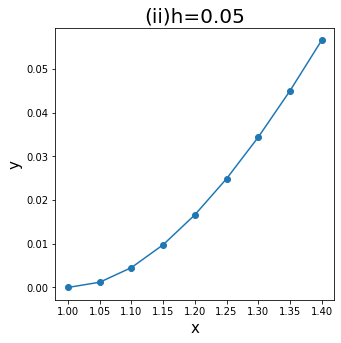

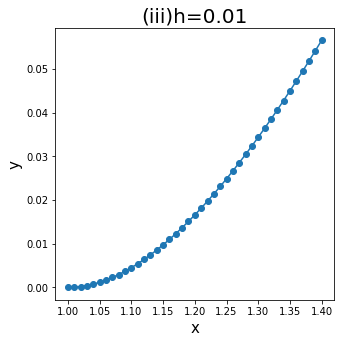

In [5]:
#defining parameters
A = lambda x: x*x
B = lambda x: x
C = lambda x: 0
D = lambda x: 1

H=[0.1, 0.05, 0.01]
x0=1
y0=0
xn=1.4
yn=0.0566

#result
plot_result(A,B,C,D,H,x0,y0,xn,yn)

<b>Question2:</b><br>
    y"-y=x<br>
    y(0)=0, y(1)=0<br>
    Solve by taking
    (i)h=0.1,
    (ii)h=0.05,
    (iii)h=0.01,

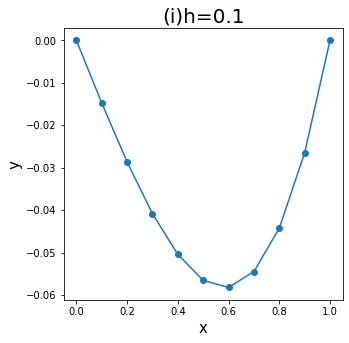

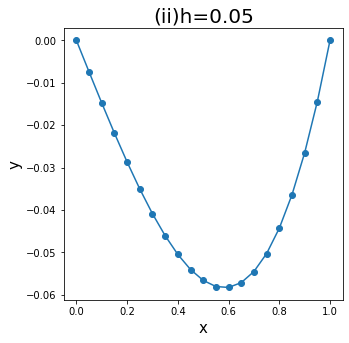

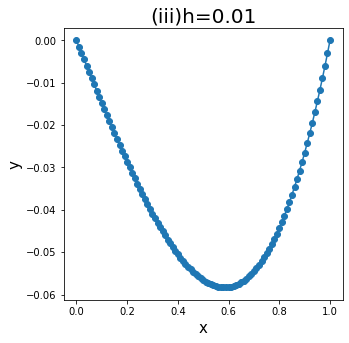

In [6]:
#defining parameters
A = lambda x: 1
B = lambda x: 0
C = lambda x: -1
D = lambda x: x

H=[0.1, 0.05, 0.01]
x0=0
y0=0
xn=1
yn=0

#result
plot_result(A,B,C,D,H,x0,y0,xn,yn)

<b>Question3:</b><br>
    y"+2xy'+2y= 4x<br>
    y(0)=1, y(0.5)=1.279<br>
    Solve by taking
    (i)h=0.1,
    (ii)h=0.05,
    (iii)h=0.01,

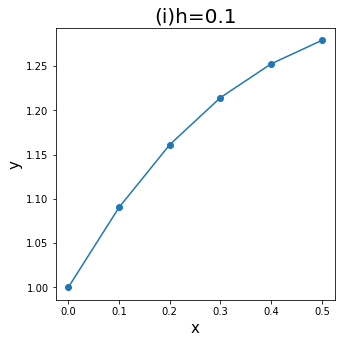

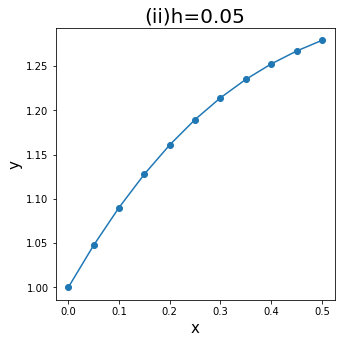

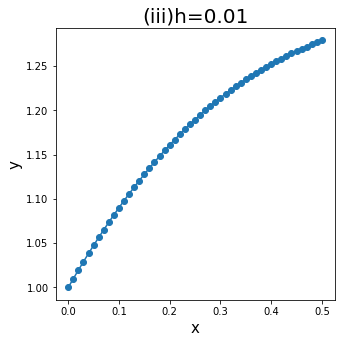

In [7]:
#defining parameters
A = lambda x: 1
B = lambda x: 2*x
C = lambda x: 2
D = lambda x: 4*x

H=[0.1, 0.05, 0.01]
x0=0
y0=1
xn=0.5
yn=1.279

#result
plot_result(A,B,C,D,H,x0,y0,xn,yn)

<b>Question4:</b><br>
    y"-2xy'-2y= -4x<br>
    y(0)-y'(0)=0, 2y(1)-y'(1)=1<br>
    Solve by taking
    (i)h=0.1,
    (ii)h=0.05,
    (iii)h=0.01,

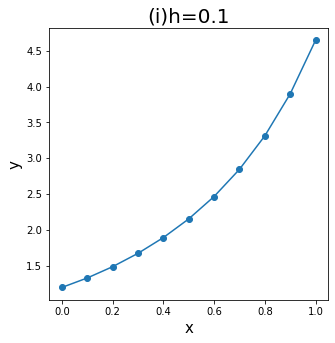

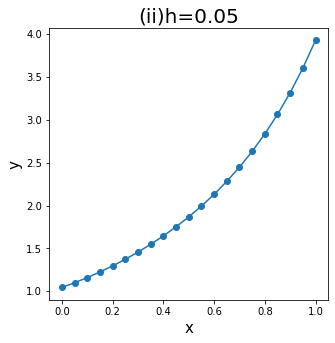

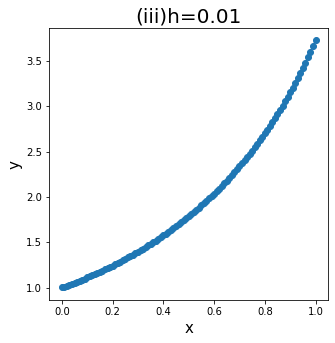

In [9]:

#defining parameters
A = lambda x: 1
B = lambda x: -2*x
C = lambda x: -2
D = lambda x: -4*x

H=[0.1, 0.05, 0.01]
x0=0
a0=1; b0=-1; y0=0
xn=1
an=2; bn=-1; yn=1

#result
plot_result(A,B,C,D,H,x0,y0,xn,yn,a0,b0,an,bn)

<b>Question5:</b><br>
    y"-2y= 0<br>
    y(0)=1, y'(1)=0<br>
    Solve by taking
    (i)h=0.1,
    (ii)h=0.05,
    (iii)h=0.01,

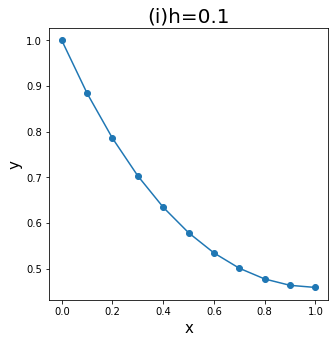

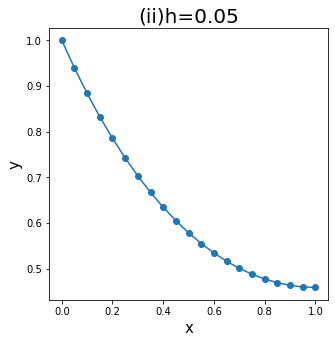

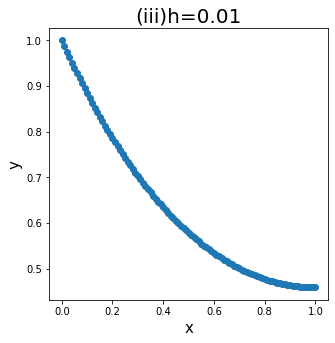

In [11]:
#defining parameters
A = lambda x: 1
B = lambda x: 0
C = lambda x: -2
D = lambda x: 0

H=[0.1, 0.05, 0.01]
x0=0
a0=1; b0=0; y0=1
xn=1
an=0; bn=1; yn=0


#result
plot_result(A,B,C,D,H,x0,y0,xn,yn,a0,b0,an,bn)